In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import joblib
import collections

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


np.random.seed(42)

%matplotlib inline

In [89]:
TEST_SIZE = 0.1

In [145]:
%run 'Params.ipynb'

In [91]:
X_test = pd.read_csv('X_test')
y_test = pd.read_csv('y_test')

In [92]:
df = pd.read_csv('urban_sound.csv')

In [93]:
df.describe()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mel_s124,mel_s125,mel_s126,mel_s127,tonn0,tonn1,tonn2,tonn3,tonn4,tonn5
count,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,...,5.435000e+03,5.435000e+03,5.435000e+03,5.435000e+03,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000
mean,-230.594786,117.002976,-29.107316,21.059276,-13.206914,14.435149,-7.827222,11.639220,-9.877271,9.248917,...,1.315041e-03,3.877872e-04,9.034433e-05,2.894091e-04,-0.000768,0.004297,-0.000637,0.001743,0.000284,0.000659
std,128.543631,48.285532,31.748864,22.032585,15.951739,14.469189,13.154916,10.981661,10.255673,8.594918,...,1.243318e-02,3.562950e-03,7.928601e-04,4.285446e-03,0.070988,0.071657,0.095433,0.090164,0.037466,0.033525
min,-765.879761,-55.461746,-165.823181,-62.845173,-100.633797,-57.730389,-65.272728,-34.883915,-47.263733,-35.710835,...,1.955137e-10,9.722057e-11,2.997953e-11,3.611320e-12,-0.402029,-0.379952,-0.478765,-0.475812,-0.250710,-0.144819
25%,-313.380249,88.710949,-47.118084,9.866420,-23.499930,6.350509,-15.441720,5.645473,-16.254159,4.051035,...,1.753328e-06,6.548172e-07,2.486630e-07,9.091323e-08,-0.026789,-0.022685,-0.040319,-0.038722,-0.014140,-0.014859
50%,-216.086792,122.770348,-26.312748,22.838654,-13.179688,16.500433,-7.612809,12.202860,-9.686731,10.001379,...,2.058635e-05,6.101170e-06,1.739286e-06,6.426781e-07,-0.000668,0.005938,-0.001431,0.000362,0.001217,-0.000418
75%,-131.663040,149.515541,-8.971909,35.475960,-2.059110,23.533415,-0.135463,18.052151,-3.194678,14.907659,...,2.041550e-04,5.074107e-05,1.231945e-05,3.503294e-06,0.025066,0.033272,0.038174,0.039127,0.016918,0.013511
max,131.924393,270.124237,64.994560,114.069862,44.862610,58.978977,54.564720,50.417439,22.942659,57.362923,...,5.638991e-01,1.088623e-01,2.790473e-02,7.873288e-02,0.562779,0.371809,0.492748,0.459640,0.210154,0.198803


In [94]:
df.isna().sum().sum()

0

In [95]:
collections.Counter(df.dtypes.values)

Counter({dtype('O'): 1, dtype('float64'): 166})

In [96]:
df_count = df.groupby(by = 'class').count()['mfcc1']
df_count.name = ''

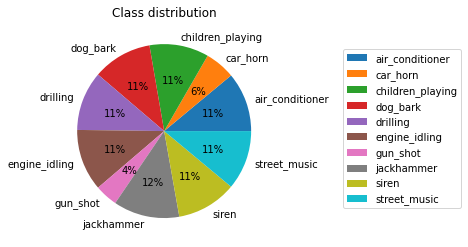

In [97]:
df_test = pd.concat([X_test,y_test],axis=1)
df_count_test = df.groupby(by = 'class').count()['mfcc1']
df_count_test.name = ' '
df_count_test.plot.pie(y='class', figsize=(4, 4),autopct='%.0f%%', title = 'Class distribution')
plt.legend(bbox_to_anchor=(1.3,0.9));

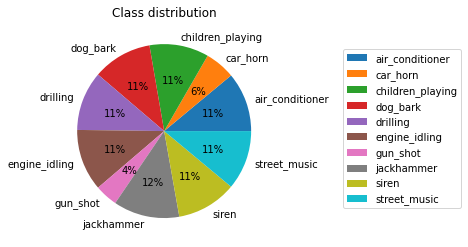

In [98]:

df_count.plot.pie(y='class', figsize=(4, 4),autopct='%.0f%%', title = 'Class distribution')
plt.legend(bbox_to_anchor=(1.3,0.9));


# Predictions

In [100]:
nn_rgrid = joblib.load('Models/nn.pkl')

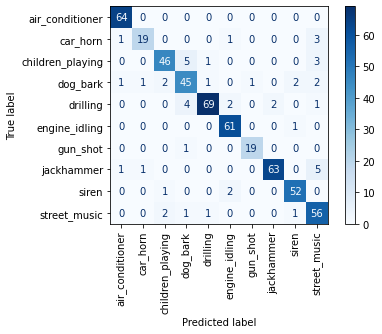

In [160]:
cm = confusion_matrix(y_test, nn_rgrid.predict(X_test), labels=nn_rgrid.classes_)
cf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_rgrid.classes_)
cf.plot(
    cmap="Blues", values_format='', xticks_rotation=90,) 

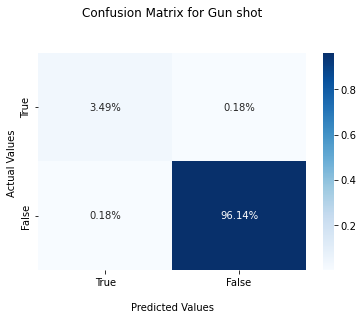

In [161]:
ax = plt.gca()
plot_individual_confusion_matrix(6,cm, 'Gun shot',ax)

In [158]:
nn_rgrid.score(X_test,y_test)

0.9080882352941176

In [147]:
lgr_rgrid = joblib.load('Models/lgr.pkl')

In [149]:
lgr_rgrid.score(X_test,y_test)

0.7444852941176471

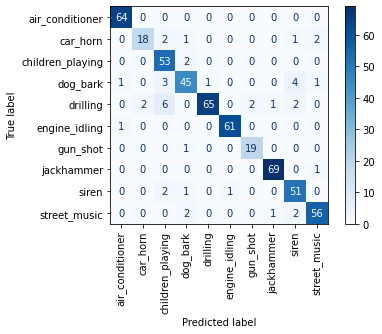

In [ ]:
cm = confusion_matrix(y_test, lgr_rgrid.predict(X_test), labels=lgr_rgrid.classes_)
cf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr_rgrid.classes_)
cf.plot(
    cmap="Blues", values_format='', xticks_rotation=90,) 

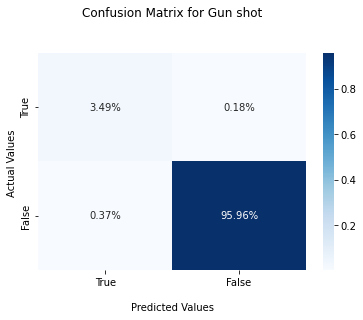

In [ ]:
ax = plt.gca()
plot_individual_confusion_matrix(6,cm, 'Gun shot',ax)

In [150]:
knn_rgrid = joblib.load('Models/knn.pkl')

In [151]:
knn_rgrid.score(X_test,y_test)

0.9209558823529411

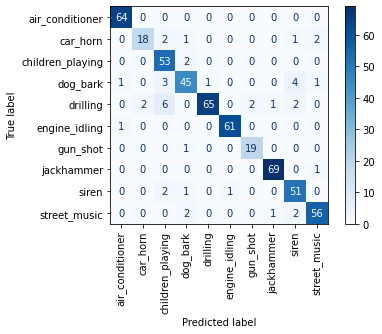

In [155]:
cm = confusion_matrix(y_test, knn_rgrid.predict(X_test), labels=knn_rgrid.classes_)
cf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_rgrid.classes_)
cf.plot(
    cmap="Blues", values_format='', xticks_rotation=90,) 

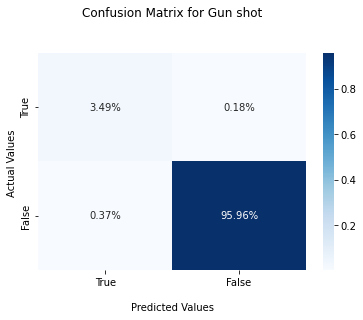

In [157]:
ax = plt.gca()
plot_individual_confusion_matrix(6,cm, 'Gun shot',ax)

In [ ]:
nn_pca_rgrid.score(X_test,y_test)

0.87569573283859

In [ ]:
lgr_pca_rgrid.score(X_test,y_test)

0.6808905380333952

In [ ]:
print(knn_pca_rgrid.best_estimator_)
print(knn_pca_rgrid.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, svd_solver='full')),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])
0.9193494930561472


In [ ]:
knn_pca_rgrid.score(X_test,y_test)

0.9183673469387755